In [1]:
from cifar_deep_nf import *

/apps/conda/joao.pires/.envs/jpt_main/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[rank: 0] Seed set to 42


Using device cuda:0
Files already downloaded and verified
Files already downloaded and verified


In [42]:
import pickle 

with open('test_dic.pkl', 'rb') as fp:
    test_dic = pickle.load(fp)

with open('train_dic.pkl', 'rb') as fp:
    train_dic = pickle.load(fp)


In [8]:
classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

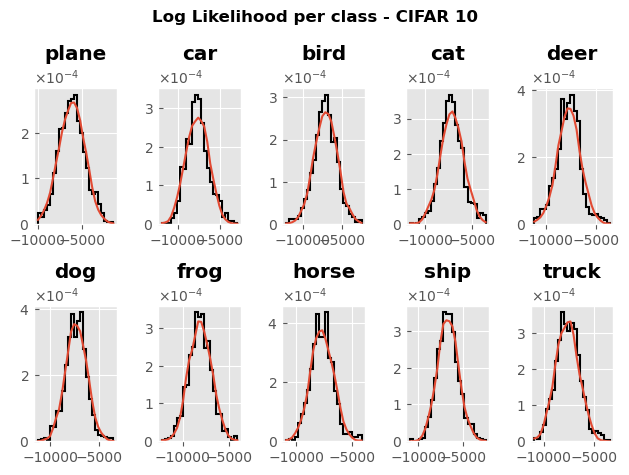

In [57]:
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, ScalarFormatter) 
fig, ax = plt.subplots(ncols = 5, nrows = 2)
plt.style.use('ggplot')
idx1 = 0

for i in range(2):
    for j in range(5):
        distribution = test_dic[str(idx1)]['ll']

        n, x, _ = ax[i,j].hist(distribution, histtype=u'step', bins = 25, density = True, color = 'k', lw = 1.5);
        noise = np.random.normal(np.median(distribution), np.std(distribution), (2000, ))
        density = stats.gaussian_kde(noise)
        ax[i,j].plot(x, density(x))
        
        ax[i,j].set_title(classes[idx1], weight = 'bold');
        idx1+=1
        ax[i,j].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        ax[i,j].tick_params(axis = 'y', which = 'both', direction = 'in')
        formatter = ScalarFormatter(useMathText=True)
        formatter.set_scientific(True)
        formatter.set_powerlimits((-1, 1))  # Adjust the power limits as needed
        ax[i,j].yaxis.set_major_formatter(formatter)


plt.subplots_adjust(wspace = 0.25, hspace = 0.35)
fig.suptitle('Log Likelihood per class - CIFAR 10', weight = 'bold')
plt.tight_layout()
plt.savefig('./images/perclass_cifar_histogram_ll.png')



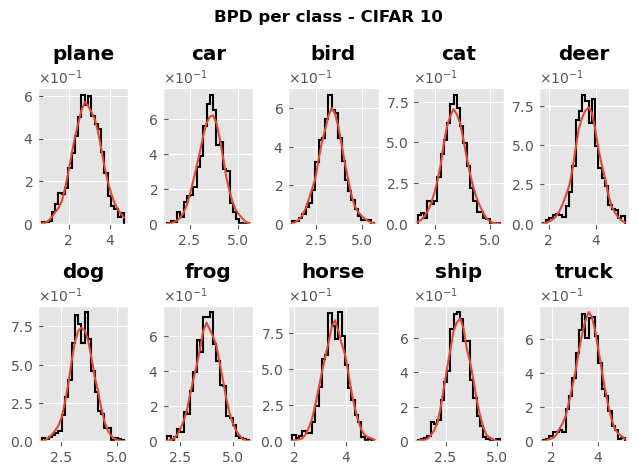

In [58]:
import scipy.stats as stats

fig, ax = plt.subplots(ncols = 5, nrows = 2)
plt.style.use('ggplot')
idx1 = 0
for i in range(2):
    for j in range(5):
        distribution = test_dic[str(idx1)]['bpd']

        n, x, _ = ax[i,j].hist(distribution, histtype=u'step', bins = 25, density = True, color = 'k', lw = 1.5);
        noise = np.random.normal(np.median(distribution), np.std(distribution), (2000, ))
        density = stats.gaussian_kde(noise)
        ax[i,j].plot(x, density(x))
        
        ax[i,j].set_title(classes[idx1], weight = 'bold');
        idx1+=1
        ax[i,j].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        ax[i,j].tick_params(axis = 'y', which = 'both', direction = 'in')
        formatter = ScalarFormatter(useMathText=True)
        formatter.set_scientific(True)
        formatter.set_powerlimits((-1, 1))  # Adjust the power limits as needed
        ax[i,j].yaxis.set_major_formatter(formatter)


plt.subplots_adjust(wspace = 0.25, hspace = 0.35)
fig.suptitle('BPD per class - CIFAR 10', weight = 'bold')
plt.tight_layout()
plt.savefig('./images/perclass_cifar_histogram_bpd.png')



In [11]:
lls_sorted = []
bpds_sorted = []

means_ll = []
stds_ll = []
means_bpd = []
stds_bpd = []


for key in test_dic:
    lls_sorted.append(np.argsort(test_dic[key]['ll']))
    bpds_sorted.append(np.argsort(test_dic[key]['bpd']))
    
    means_ll.append(np.mean(test_dic[key]['ll']))
    stds_ll.append(np.std(test_dic[key]['ll']))
    
    means_bpd.append(np.mean(test_dic[key]['bpd']))
    stds_bpd.append(np.std(test_dic[key]['bpd']))

In [12]:
how_many_ood = []
how_many_bpd = []

for i in range(0,10):
    key = str(i)
    lls = test_dic[key]['ll'] < means_ll[i] - 2*stds_ll[i]
    bpds = test_dic[key]['bpd'] < means_bpd[i] - 2*stds_bpd[i]
    how_many_ood.append(lls.sum())
    how_many_bpd.append(bpds.sum())

In [13]:
how_many_ood, how_many_bpd

([23, 13, 29, 24, 30, 32, 26, 16, 17, 18],
 [30, 32, 21, 33, 33, 24, 27, 32, 34, 32])

In [60]:
means_ll

[-6119.415827880859,
 -7585.592895263672,
 -7100.956051513672,
 -7198.05115234375,
 -7774.57354321289,
 -7322.412089111328,
 -8107.926503417969,
 -7625.024532226563,
 -6632.9554270019535,
 -7577.9003076171875]

In [59]:
final = ''
for i, element in enumerate(means_ll):
    final += f'{classes[i]} & {means_ll[i]: .0f} & {stds_ll[i]: .0f} & {how_many_ood[i]} \\\ \n '

print(final)

plane & -6119 &  1458 & 23 \\ 
 car & -7586 &  1339 & 13 \\ 
 bird & -7101 &  1455 & 29 \\ 
 cat & -7198 &  1212 & 24 \\ 
 deer & -7775 &  1154 & 30 \\ 
 dog & -7322 &  1101 & 32 \\ 
 frog & -8108 &  1251 & 26 \\ 
 horse & -7625 &  1027 & 16 \\ 
 ship & -6633 &  1170 & 17 \\ 
 truck & -7578 &  1168 & 18 \\ 
 


In [65]:
final = ''
for i, element in enumerate(means_bpd):
    final += f'{classes[i]} & {means_bpd[i]: .3f} & {stds_bpd[i]: .3f} & {how_many_bpd[i]} \\\ \n '

print(final)

plane &  2.874 &  0.684 & 30 \\ 
 car &  3.563 &  0.629 & 32 \\ 
 bird &  3.335 &  0.683 & 21 \\ 
 cat &  3.381 &  0.569 & 33 \\ 
 deer &  3.651 &  0.542 & 33 \\ 
 dog &  3.439 &  0.517 & 24 \\ 
 frog &  3.808 &  0.588 & 27 \\ 
 horse &  3.581 &  0.483 & 32 \\ 
 ship &  3.115 &  0.550 & 34 \\ 
 truck &  3.558 &  0.549 & 32 \\ 
 


In [14]:
np.sum(how_many_ood), np.sum(how_many_bpd), np.sum(how_many_ood)/len(test_set), np.sum(how_many_bpd)/len(test_set)

(228, 298, 0.0228, 0.0298)

In [40]:
def show_imgs_save(imgs, title=None, row_size=8, fig_name = None):
    # Form a grid of pictures (we use max. 8 columns)
    num_imgs = imgs.shape[0] if isinstance(imgs, torch.Tensor) else len(imgs)
    is_int = imgs.dtype==torch.int32 if isinstance(imgs, torch.Tensor) else imgs[0].dtype==torch.int32
    nrow = min(num_imgs, row_size)
    ncol = int(math.ceil(num_imgs/nrow))
    imgs = torchvision.utils.make_grid(imgs, nrow=nrow, pad_value=128 if is_int else 0.5)
    np_imgs = imgs.cpu().numpy()/255
    # Plot the grid
    plt.figure(figsize=(1.5*nrow, 1.5*ncol))
    plt.imshow(np.transpose(np_imgs, (1,2,0)), interpolation='nearest')
    plt.axis('off')
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    if fig_name:
        plt.savefig(fig_name + '.png', format = 'png')
    plt.show()
    plt.close()

In [52]:
lls_sorted_train = []
bpds_sorted_train = []


for key in test_dic:
    lls_sorted_train.append(np.argsort(train_dic[key]['ll']))
    bpds_sorted_train.append(np.argsort(train_dic[key]['bpd']))
    
#     means_ll.append(np.mean(test_dic[key]['ll']))
#     stds_ll.append(np.std(test_dic[key]['ll']))
    
#     means_bpd.append(np.mean(test_dic[key]['bpd']))
#     stds_bpd.append(np.std(test_dic[key]['bpd']))

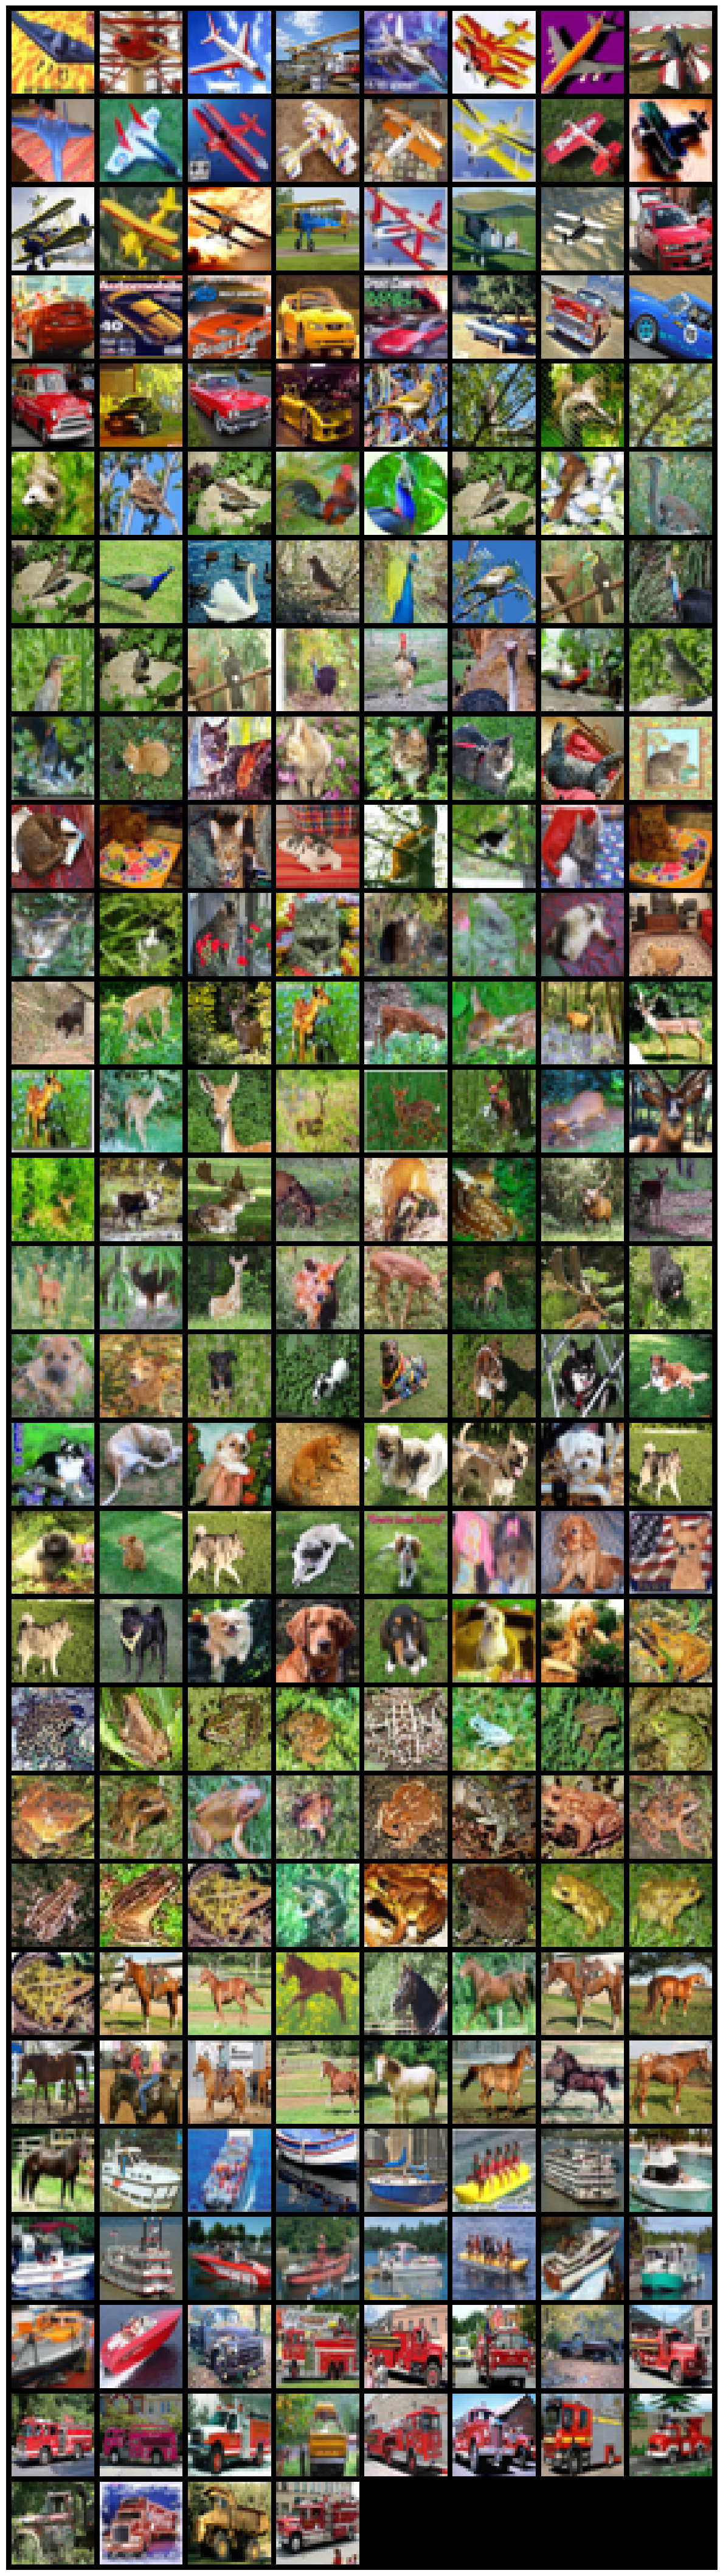

In [53]:
number_of_anomalous = np.sum(how_many_ood)

top_anomalous = torch.zeros(size = (number_of_anomalous, 3, 32, 32))

j = 0

for i in range(10):
    pos = lls_sorted_train[i][:how_many_ood[i]]
    for element in (pos):
        top_anomalous[j] = train_dic[str(i)]['img'][element]
        j += 1

show_imgs_save(top_anomalous, fig_name = 'images/perclass_cifar_ll')

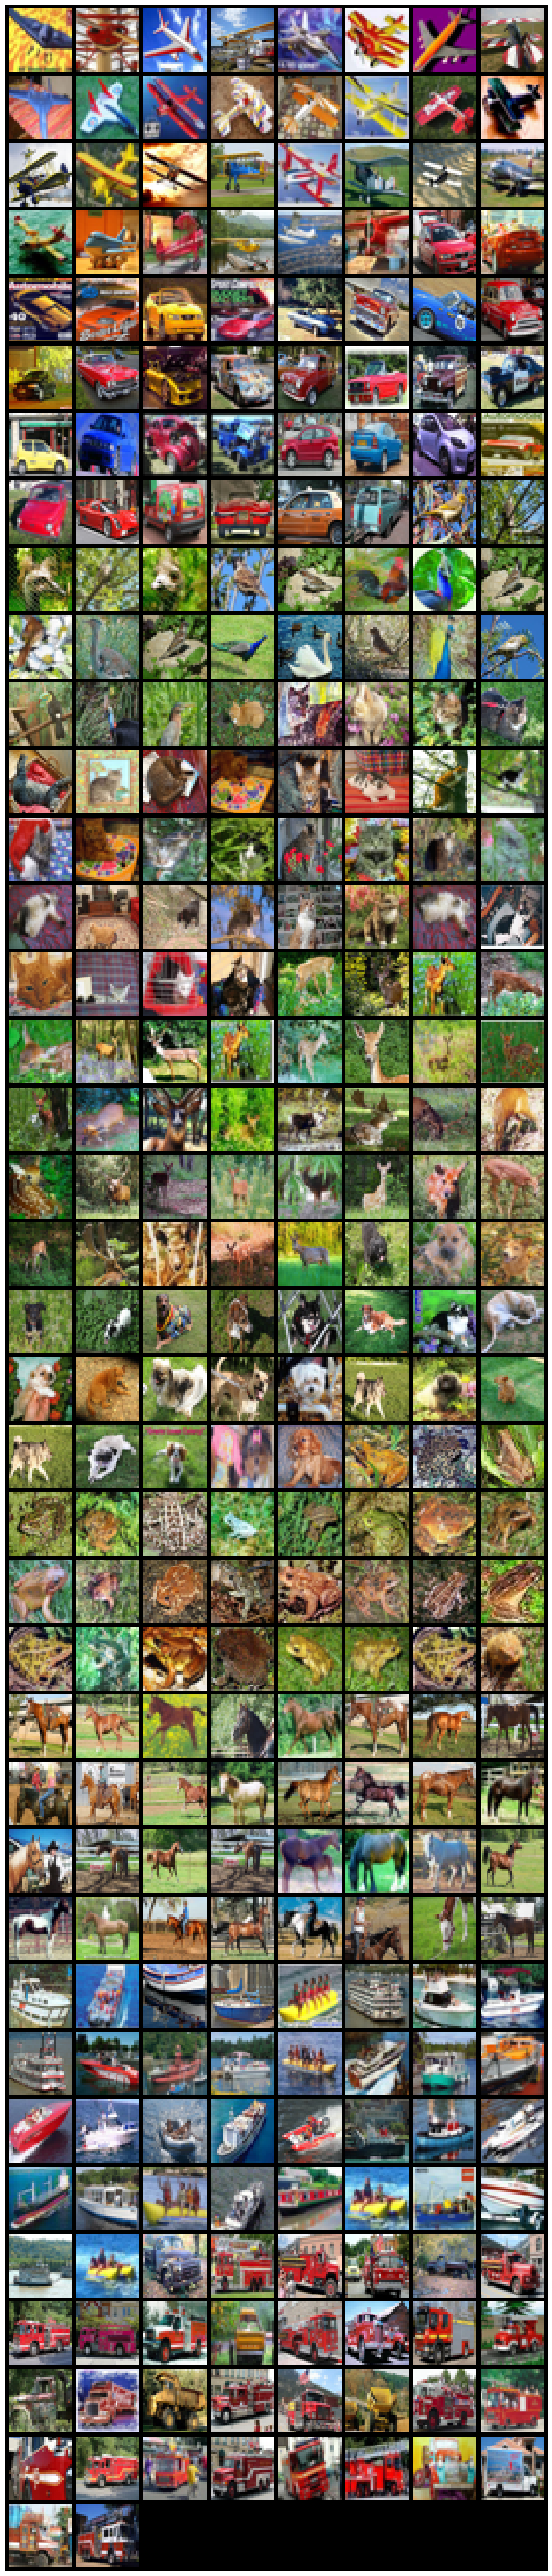

In [54]:
number_of_anomalous = np.sum(how_many_bpd)

top_anomalous = torch.zeros(size = (number_of_anomalous, 3, 32, 32))

j = 0

for i in range(10):
    pos = lls_sorted_train[i][:how_many_bpd[i]]
    for element in (pos):
        top_anomalous[j] = train_dic[str(i)]['img'][element]
        j += 1

show_imgs_save(top_anomalous, fig_name = 'images/perclass_cifar_bpd')